In [4]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

#### Импорт таблиц

In [21]:
no_cheaters = pd.read_csv('no_cheaters.csv')

In [22]:
no_cheaters.head()

,user_id,group,cheaters,cash,money
0,VX6NLA-F5YMSW,control,0,5050,5.96
1,2AXN3D-71ZN86,test,0,5600,4.96
2,K78V3J-TQMV6F,test,0,5850,3.96
3,Z2KEIG-LY3V4H,test,0,5900,4.96
4,ND92RZ-SHG980,control,0,9000,9.94


In [24]:
no_cheaters = no_cheaters[['user_id', 'group']]

In [43]:
money = pd.read_csv('Money.csv')
cash = pd.read_csv('Cash.csv')
platform = pd.read_csv('Platforms.csv')

In [44]:
platform.user_id.count()

8640000

#### Проверка и удаление дубликатов в таблицах

In [45]:
platform.duplicated().sum()

7560000

In [46]:
platform = platform.drop_duplicates(subset=['user_id'])

#### Join таблиц

In [47]:
platform.user_id.count()

1080000

In [48]:
no_cheaters.user_id.nunique()

1079303

In [49]:
no_cheaters = no_cheaters.merge(platforms, on='user_id')

In [50]:
no_cheaters.head()

,user_id,group,platform
0,VX6NLA-F5YMSW,control,XBox
1,2AXN3D-71ZN86,test,PC
2,K78V3J-TQMV6F,test,XBox
3,Z2KEIG-LY3V4H,test,PS4
4,ND92RZ-SHG980,control,XBox


In [51]:
no_cheaters.user_id.nunique()

1079303

In [52]:
no_cheaters.user_id.count()

1079303

In [54]:
money_cash = cash.merge(money, on=['user_id','date'], how='outer').fillna(0)

In [56]:
money_cash_table = money_cash.merge(no_cheaters, on='user_id', how='left')

In [57]:
money_cash_table.head()

,user_id,date,cash,money,group,platform
0,GGLSXL-U5BGGY,17.07.2021,200,0.00,control,XBox
1,DPWFFN-NL3VF8,16.07.2021,150,0.99,test,PS4
2,PASNNG-GVW4RR,11.07.2021,1100,0.99,control,XBox
3,4F0AW7-F40GY9,15.07.2021,1050,0.99,control,PC
4,CEY6AF-YTSM4V,15.07.2021,150,0.99,control,PS4


In [58]:
# Фильтрация данных для групп
test_group = money_cash_table[(money_cash_table['group']=='test')]
control_group = money_cash_table[money_cash_table['group']=='control']

#### Построение графика сравнения ARPU по дням для тестовой и контрольных групп

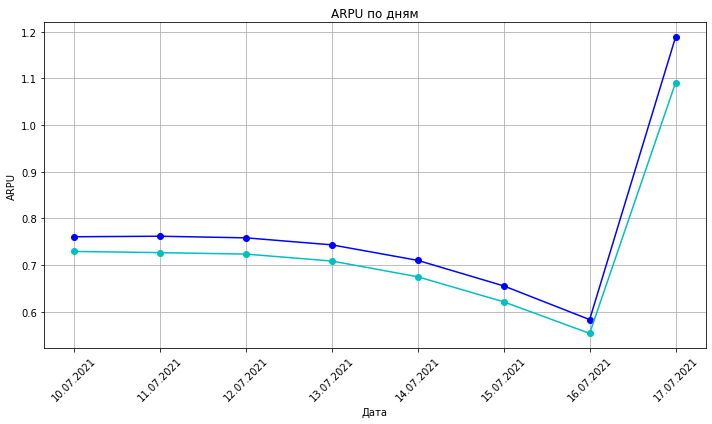

In [59]:
arpu_test = test_group.groupby('date').agg(total_revenue=('money','sum'),users=('user_id','count')).reset_index()
arpu_control = control_group.groupby('date').agg(total_revenue=('money','sum'),users=('user_id','count')).reset_index()
arpu_test['arpu'] = arpu_test['total_revenue']/arpu_test['users']
arpu_control['arpu'] = arpu_control['total_revenue']/arpu_control['users']
plt.figure(figsize=(10,6))
plt.plot(arpu_test['date'],arpu_test['arpu'],marker='o',linestyle='-',color='b')
plt.plot(arpu_control['date'],arpu_control['arpu'],marker='o',linestyle='-',color='c')
plt.title('ARPU по дням')
plt.xlabel('Дата')
plt.ylabel('ARPU')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Построение графика сравнения ARPPU по дням для тестовой и контрольной групп

In [62]:
arppu_t = test_group[test_group['money']>0]
arppu_c = control_group[control_group['money']>0]

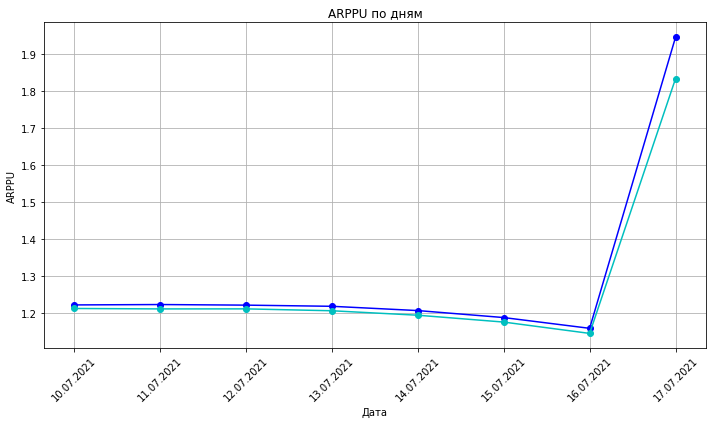

In [63]:
arppu_test = arppu_t.groupby('date').agg(total_revenue=('money','sum'),users=('user_id','count')).reset_index()
arppu_control = arppu_c.groupby('date').agg(total_revenue=('money','sum'),users=('user_id','count')).reset_index()
arppu_test['arppu'] = arppu_test['total_revenue']/arppu_test['users']
arppu_control['arppu'] = arppu_control['total_revenue']/arppu_control['users']
plt.figure(figsize=(10,6))
plt.plot(arppu_test['date'],arppu_test['arppu'],marker='o',linestyle='-',color='b')
plt.plot(arppu_control['date'],arppu_control['arppu'],marker='o',linestyle='-',color='c')
plt.title('ARPPU по дням')
plt.xlabel('Дата')
plt.ylabel('ARPPU')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Фильтрация данных для пользователей различных платформ и групп¶

In [64]:
XBox_test = money_cash_table[(money_cash_table['group']=='test')& (money_cash_table['platform']=='XBox')]
XBox_control = money_cash_table[(money_cash_table['group']=='control')& (money_cash_table['platform']=='XBox')]

In [65]:
PC_test = money_cash_table[(money_cash_table['group']=='test')& (money_cash_table['platform']=='PC')]
PC_control = money_cash_table[(money_cash_table['group']=='control')& (money_cash_table['platform']=='PC')]

In [73]:
PS4_test = money_cash_table[(money_cash_table['group']=='test')& (money_cash_table['platform']=='PS4')]
PS4_control = money_cash_table[(money_cash_table['group']=='control')& (money_cash_table['platform']=='PS4')]

### Построение графика сравнения метрик для платформы XBox по дням

In [67]:
### Расчет ARPU по дням для тестовой и контрольной группы
arpu_XBox_test = XBox_test.groupby('date').agg({'money': 'sum', 'user_id': 'nunique'}).reset_index()
arpu_XBox_test['arpu'] = arpu_XBox_test['money'] / arpu_XBox_test['user_id']
arpu_XBox_control = XBox_control.groupby('date').agg({'money': 'sum', 'user_id': 'nunique'}).reset_index()
arpu_XBox_control['arpu'] = arpu_XBox_control['money'] / arpu_XBox_control['user_id']

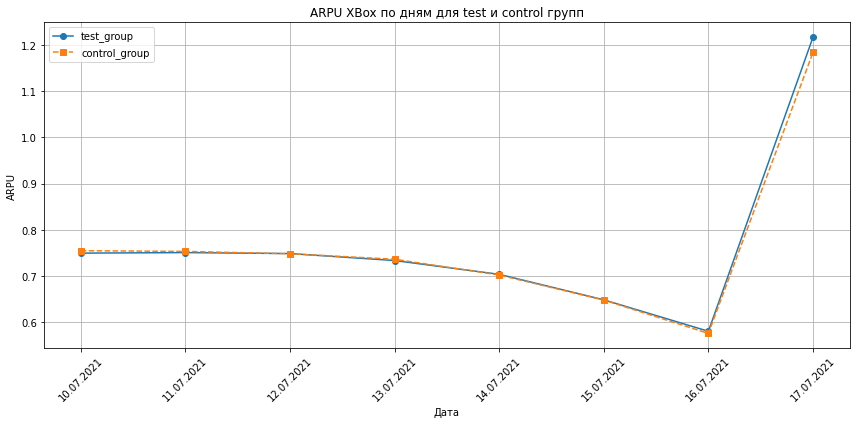

In [68]:
### Построение графика
plt.figure(figsize=(12, 6))
plt.plot(arpu_XBox_test['date'], arpu_XBox_test['arpu'], marker='o', linestyle='-', label='test_group')
plt.plot(arpu_XBox_control['date'], arpu_XBox_control['arpu'], marker='s', linestyle='--', label='control_group')
plt.title('ARPU XBox по дням для test и control групп')
plt.xlabel('Дата')
plt.ylabel('ARPU')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Построение графика сравнения метрик для платформы PC по дням

In [69]:
### Расчет ARPU по дням для тестовой и контрольной группы
arpu_PC_test = PC_test.groupby('date').agg({'money': 'sum', 'user_id': 'nunique'}).reset_index()
arpu_PC_test['arpu'] = arpu_PC_test['money'] / arpu_PC_test['user_id']
arpu_PC_control = PC_control.groupby('date').agg({'money': 'sum', 'user_id': 'nunique'}).reset_index()
arpu_PC_control['arpu'] = arpu_PC_control['money'] / arpu_PC_control['user_id']

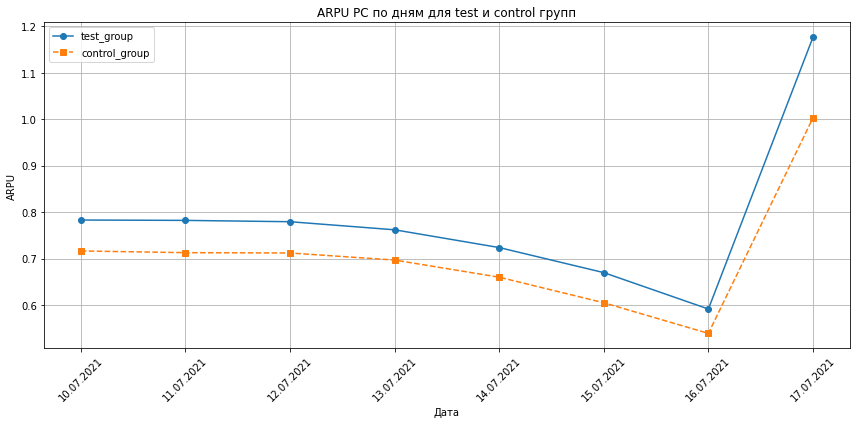

In [70]:
### Построение графика
plt.figure(figsize=(12, 6))
plt.plot(arpu_PC_test['date'], arpu_PC_test['arpu'], marker='o', linestyle='-', label='test_group')
plt.plot(arpu_PC_control['date'], arpu_PC_control['arpu'], marker='s', linestyle='--', label='control_group')
plt.title('ARPU PC по дням для test и control групп')
plt.xlabel('Дата')
plt.ylabel('ARPU')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Построение графика сравнения метрик для платформы PS4 по дням

In [74]:
### Расчет ARPU по дням для тестовой и контрольной группы
arpu_PS4_test = PS4_test.groupby('date').agg({'money': 'sum', 'user_id': 'nunique'}).reset_index()
arpu_PS4_test['arpu'] = arpu_PS4_test['money'] / arpu_PS4_test['user_id']
arpu_PS4_control = PS4_control.groupby('date').agg({'money': 'sum', 'user_id': 'nunique'}).reset_index()
arpu_PS4_control['arpu'] = arpu_PS4_control['money'] / arpu_PS4_control['user_id']

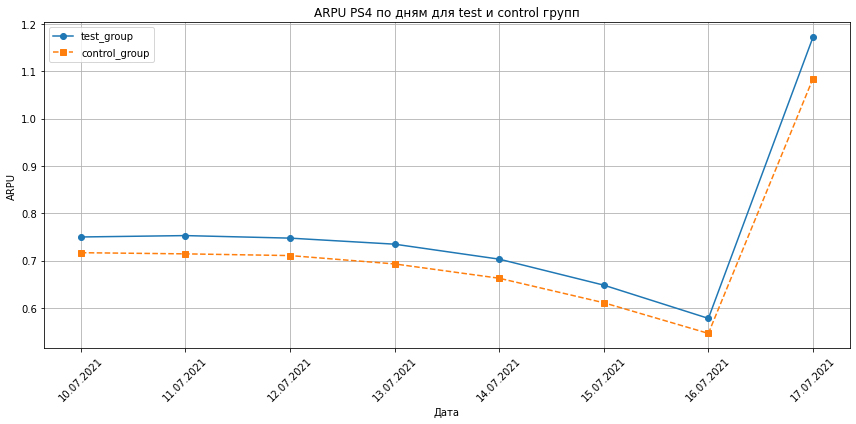

In [75]:
### Построение графика
plt.figure(figsize=(12, 6))
plt.plot(arpu_PS4_test['date'], arpu_PS4_test['arpu'], marker='o', linestyle='-', label='test_group')
plt.plot(arpu_PS4_control['date'], arpu_PS4_control['arpu'], marker='s', linestyle='--', label='control_group')
plt.title('ARPU PS4 по дням для test и control групп')
plt.xlabel('Дата')
plt.ylabel('ARPU')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Рассчет ARPPU для различных платформ

In [77]:
### Построение графика сравнения метрик для платформы XBox по дням

In [78]:
XBox_test = XBox_test[XBox_test['money']!=0]
XBox_control = XBox_control[XBox_control['money']!=0]

In [79]:
### Расчет ARPPU по дням для тестовой и контрольной группы
arppu_XBox_test = XBox_test.groupby('date').agg({'money': 'sum', 'user_id': 'nunique'}).reset_index()
arppu_XBox_test['arpu'] = arppu_XBox_test['money'] / arppu_XBox_test['user_id']
arppu_XBox_control = XBox_control.groupby('date').agg({'money': 'sum', 'user_id': 'nunique'}).reset_index()
arppu_XBox_control['arpu'] = arppu_XBox_control['money'] / arppu_XBox_control['user_id']

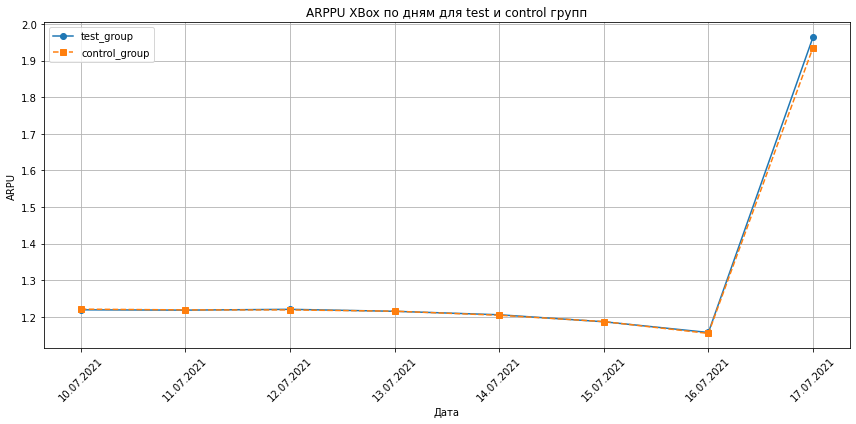

In [80]:
### Построение графика
plt.figure(figsize=(12, 6))
plt.plot(arppu_XBox_test['date'], arppu_XBox_test['arpu'], marker='o', linestyle='-', label='test_group')
plt.plot(arppu_XBox_control['date'], arppu_XBox_control['arpu'], marker='s', linestyle='--', label='control_group')
plt.title('ARPPU XBox по дням для test и control групп')
plt.xlabel('Дата')
plt.ylabel('ARPU')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [81]:
### Построение графика сравнения метрик для платформы PC по дням

In [82]:
PC_test = PC_test[PC_test['money']!=0]
PC_control = PC_control[PC_control['money']!=0]

In [83]:
### Расчет ARPPU по дням для тестовой и контрольной группы
arppu_PC_test = PC_test.groupby('date').agg({'money': 'sum', 'user_id': 'nunique'}).reset_index()
arppu_PC_test['arpu'] = arppu_PC_test['money'] / arppu_PC_test['user_id']
arppu_PC_control = PC_control.groupby('date').agg({'money': 'sum', 'user_id': 'nunique'}).reset_index()
arppu_PC_control['arpu'] = arppu_PC_control['money'] / arppu_PC_control['user_id']

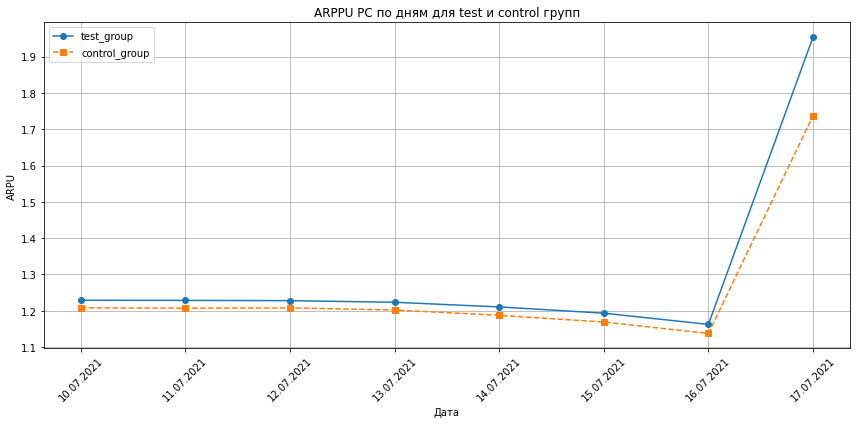

In [84]:
### Построение графика
plt.figure(figsize=(12, 6))
plt.plot(arppu_PC_test['date'], arppu_PC_test['arpu'], marker='o', linestyle='-', label='test_group')
plt.plot(arppu_PC_control['date'], arppu_PC_control['arpu'], marker='s', linestyle='--', label='control_group')
plt.title('ARPPU PC по дням для test и control групп')
plt.xlabel('Дата')
plt.ylabel('ARPU')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [85]:
### Построение графика сравнения метрик для платформы PS4 по дням

In [86]:
PS4_test = PS4_test[PS4_test['money']!=0]
PS4_control = PS4_control[PS4_control['money']!=0]

In [87]:
### Расчет ARPPU по дням для тестовой и контрольной группы
arppu_PS4_test = PS4_test.groupby('date').agg({'money': 'sum', 'user_id': 'nunique'}).reset_index()
arppu_PS4_test['arpu'] = arppu_PS4_test['money'] / arppu_PS4_test['user_id']
arppu_PS4_control = PS4_control.groupby('date').agg({'money': 'sum', 'user_id': 'nunique'}).reset_index()
arppu_PS4_control['arpu'] = arppu_PS4_control['money'] / arppu_PS4_control['user_id']

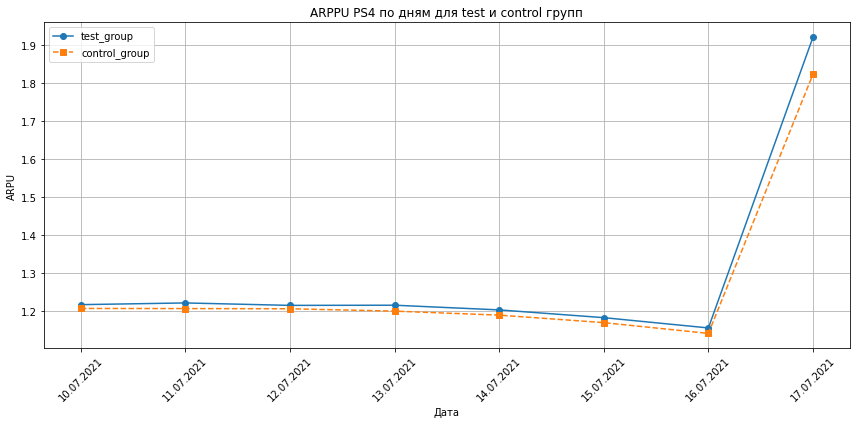

In [88]:
### Построение графика
plt.figure(figsize=(12, 6))
plt.plot(arppu_PS4_test['date'], arppu_PS4_test['arpu'], marker='o', linestyle='-', label='test_group')
plt.plot(arppu_PS4_control['date'], arppu_PS4_control['arpu'], marker='s', linestyle='--', label='control_group')
plt.title('ARPPU PS4 по дням для test и control групп')
plt.xlabel('Дата')
plt.ylabel('ARPU')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()